# Import 

In [1]:
import pandas as pd
import seaborn as sns
import boto3
import os
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [2]:
try :
    from config import AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY
except:
    AWS_ACCESS_KEY_ID = os.environ.get("AWS_ACCESS_KEY_ID")
    AWS_SECRET_ACCESS_KEY = os.environ.get("AWS_SECRET_ACCESS_KEY")

In [3]:

s3_bucket = "datarunning"
s3_key_id = "strava_id.csv"
s3_key_activities = "strava.csv"
s3_key_lap = "strava_laps.csv"

s3 = boto3.client(
    "s3",
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)



In [4]:
response = s3.get_object(Bucket=s3_bucket, Key=s3_key_activities)
df_act = pd.read_csv(response['Body'])
    
response = s3.get_object(Bucket=s3_bucket, Key=s3_key_lap)
df_lap = pd.read_csv(response['Body'])

# Feature engineering

In [5]:
df_act.loc[df_act['id'] == 10738727465,'prepa_id'] = 4

In [12]:
df_act

,id,athlete,name,type,start_date_local,Unnamed: 5,distance,moving_time,total_elevation_gain,sport_type,...,moving_time_minute,moving_time_hour,Numéro de semaine,Durée de prépa,Numéro de seance,Seance/semaine,prepa_id,Cumul_weekly_volume,total_weekly_volume,total_weekly_volume.1
0,10738727465,98364076,S10/18 - 5/5 - Prépa MDP - footing EF,Run,2024-02-11T09:57:21Z,NaN,6.1046,2281,26.0,Run,...,38.016667,0.633611,10,18,5,5,4.0,6.1046,NaN,6.1046
1,10705542506,98364076,S10/18 - 1/5 - Prépa MDP - Footing EF,Run,2024-02-06T06:37:18Z,2024-02-06,6.2548,2400,55.0,Run,...,40.000000,0.666667,10,18,1,5,4.0,6.2548,31.9011,31.9011
2,10712557398,98364076,S10/18 - 2/5 - Prépa MDP - Variation d'allures...,Run,2024-02-07T06:30:04Z,2024-02-07,8.4681,2970,44.0,Run,...,49.500000,0.825000,10,18,2,5,4.0,14.7229,31.9011,31.9011
3,10725692821,98364076,S10/18 - 3/5 - Prépa MDP - Footing EF + 6LD,Run,2024-02-09T07:32:02Z,NaN,7.1799,2613,48.0,Run,...,43.550000,0.725833,10,18,3,5,4.0,21.9028,31.9011,31.9011
4,10732650255,98364076,S10/18 - 4/5 - Prépa MDP - Sortie longue,Run,2024-02-10T11:04:29Z,NaN,9.9983,3668,57.0,Run,...,61.133333,1.018889,10,18,4,5,4.0,31.9011,31.9011,31.9011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,10502925949,98364076,S5 - 3/4 - Prepa MDP - Footing EF,Run,2024-01-06T08:48:57Z,2024-01-06,7.3240,2703,46.0,Run,...,45.050000,0.750833,5,18,3,4,NaN,NaN,NaN,NaN
251,10413277385,98364076,S3 - 3/4 - Prepa MDP - Endurance de force,Run,2023-12-21T07:13:23Z,2023-12-21,8.9999,3291,87.0,Run,...,54.850000,0.914167,3,18,3,4,NaN,NaN,NaN,NaN
252,10325426361,98364076,S1 - 1/4 - Introduction d'intensité (Seuil30),Run,2023-12-04T06:34:42Z,2023-12-04,7.9020,2794,47.0,Run,...,46.566667,0.776111,1,18,1,4,NaN,NaN,NaN,NaN
253,10335947213,98364076,S1 - 2/4 - Prepa MDP - introduction d'intensit...,Run,2023-12-06T06:33:26Z,2023-12-06,9.1301,3241,46.0,Run,...,54.016667,0.900278,1,18,2,4,NaN,NaN,NaN,NaN


In [7]:
df_act = df_act.dropna(subset=["numero_semaine_prepa", 'numero_seance_semaine'])
df_act.sort_values(by='start_date_local', ascending=False, inplace=True)
df_act

,id,athlete,name,type,start_date_local,Unnamed: 5,distance,moving_time,total_elevation_gain,sport_type,...,pr_count,total_photo_count,suffer_score,numero_semaine_prepa,numero_seance_semaine,type_seance,prepa_name,average_pace,moving_time_minute,moving_time_hour
482,10732650255,98364076,S10/18 - 4/5 - Prépa MDP - Sortie longue,Run,2024-02-10T11:04:29Z,NaN,9998.3,3668,57.0,Run,...,0,0,76.0,S10/18,4/5,Sortie longue,Prépa MDP,6.116208,61.133333,1.018889
481,10725692821,98364076,S10/18 - 3/5 - Prépa MDP - Footing EF + 6LD,Run,2024-02-09T07:32:02Z,NaN,7179.9,2613,48.0,Run,...,0,0,33.0,S10/18,3/5,Footing EF + 6LD,Prépa MDP,6.066734,43.550000,0.725833
480,10712557398,98364076,S10/18 - 2/5 - Prépa MDP - Variation d'allures...,Run,2024-02-07T06:30:04Z,2024-02-07,8468.1,2970,44.0,Run,...,0,0,47.0,S10/18,2/5,"Variation d'allures (VMA, Seuil60)",Prépa MDP,5.847953,49.500000,0.825000
479,10705542506,98364076,S10/18 - 1/5 - Prépa MDP - Footing EF,Run,2024-02-06T06:37:18Z,2024-02-06,6254.8,2400,55.0,Run,...,0,0,17.0,S10/18,1/5,Footing EF,Prépa MDP,6.396588,40.000000,0.666667
0,10692823418,98364076,S9/18 - 5/5 - Prépa MDP - Sortie longue,Run,2024-02-04T09:29:49Z,2024-02-04,18071.2,6094,62.0,Run,...,6,0,204.0,S9/18,5/5,Sortie longue,Prépa MDP,5.623243,101.566667,1.692778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,8080617305,98364076,Footing EF,Run,2022-11-07T06:05:39Z,2022-11-07,6521.6,2711,36.0,Run,...,0,0,15.0,S2/18,1/4,Footing EF,Prépa Semi Paris,6.928406,45.183333,0.753056
249,8070789361,98364076,Footing EF,Run,2022-11-05T10:02:33Z,2022-11-05,13177.8,4916,39.7,Run,...,1,0,113.0,S1/18,4/4,Footing EF,Prépa Semi Paris,6.217617,81.933333,1.365556
250,8065766198,98364076,Footing EF,Run,2022-11-04T07:31:52Z,2022-11-04,6932.2,2705,19.4,Run,...,0,0,17.0,S1/18,3/4,Footing EF,Prépa Semi Paris,6.500542,45.083333,0.751389
251,8055991853,98364076,12 * (30/30) VMA,Run,2022-11-02T06:31:55Z,2022-11-02,7174.8,2571,18.6,Run,...,0,0,47.0,S1/18,2/4,12 * (30/30) VMA,Prépa Semi Paris,5.970149,42.850000,0.714167


In [8]:
# df_act[['Numéro de semaine', 'Durée de prépa']] = df_act['numero_semaine_prepa'].str.split('/', expand=True)
extracted_data = df_act['numero_semaine_prepa'].str.extract(r'S(\d+)/(\d+)')
df_act['Numéro de semaine'] = extracted_data[0].astype(int)  
df_act['Durée de prépa'] = extracted_data[1].astype(int) if len(extracted_data.columns) > 1 else 0  


In [9]:
extracted_data = df_act['numero_seance_semaine'].str.extract(r'(\d+)/(\d+)')
df_act['Numéro de seance'] = extracted_data[0].astype(int)  
df_act['Seance/semaine'] = extracted_data[1].astype(int) if len(extracted_data.columns) > 1 else 0  


In [10]:
df_act.prepa_name.unique()

array(['Prépa MDP', 'Prepa MDP', 'COURSE : Semi - Boulogne',
       'Prépa SEMI BOULOGNE', 'COURSE : 10Km - PSG', 'Prépa 10Km PSG',
       'COURSE : Semi - Paris', 'Prépa Semi Paris'], dtype=object)

In [11]:
def associer_valeur(x):
    if x in ["Prépa MDP"]:
        return 4
    elif x in ["Prépa SEMI BOULOGNE", "COURSE : Semi - Boulogne"]:
        return 3
    elif x in ["Prépa 10Km PSG", "COURSE : 10Km - PSG"]:
        return 2
    elif x in ["Prépa Semi Paris", "COURSE : Semi - Paris"]:
        return 1
    
df_act["prepa_id"] = df_act["prepa_name"].apply(
    lambda x : associer_valeur(x)
    
) 

In [13]:
df_act["distance"] =  df_act["distance"]/1000

In [16]:
df_act.sort_values(by=["prepa_id", "Numéro de semaine", "Numéro de seance"],
                   ascending= [False, False, True],
                   inplace=True)

In [21]:
df_act['Cumul_weekly_volume'] = df_act.groupby(['prepa_id','Numéro de semaine'])['distance'].cumsum()
#df_act['total_weekly_volume'] = df_act.groupby(['prepa_id','Numéro de semaine'])['distance'].sum()


In [24]:
weekly_volume = df_act.groupby(['prepa_id', 'Numéro de semaine'])['distance'].sum().reset_index()
# Fusionner les données calculées avec le DataFrame d'origine
df_act = pd.merge(df_act, weekly_volume, on=['prepa_id', 'Numéro de semaine'], suffixes=('', '_weekly'), how='left')

# Renommer la colonne ajoutée
df_act.rename(columns={'distance_weekly': 'total_weekly_volume'}, inplace=True)
df_act

,id,athlete,name,type,start_date_local,Unnamed: 5,distance,moving_time,total_elevation_gain,sport_type,...,average_pace,moving_time_minute,moving_time_hour,Numéro de semaine,Durée de prépa,Numéro de seance,Seance/semaine,prepa_id,Cumul_weekly_volume,total_weekly_volume
0,10705542506,98364076,S10/18 - 1/5 - Prépa MDP - Footing EF,Run,2024-02-06T06:37:18Z,2024-02-06,6.2548,2400,55.0,Run,...,6.396588,40.000000,0.666667,10,18,1,5,4.0,6.2548,31.9011
1,10712557398,98364076,S10/18 - 2/5 - Prépa MDP - Variation d'allures...,Run,2024-02-07T06:30:04Z,2024-02-07,8.4681,2970,44.0,Run,...,5.847953,49.500000,0.825000,10,18,2,5,4.0,14.7229,31.9011
2,10725692821,98364076,S10/18 - 3/5 - Prépa MDP - Footing EF + 6LD,Run,2024-02-09T07:32:02Z,NaN,7.1799,2613,48.0,Run,...,6.066734,43.550000,0.725833,10,18,3,5,4.0,21.9028,31.9011
3,10732650255,98364076,S10/18 - 4/5 - Prépa MDP - Sortie longue,Run,2024-02-10T11:04:29Z,NaN,9.9983,3668,57.0,Run,...,6.116208,61.133333,1.018889,10,18,4,5,4.0,31.9011,31.9011
4,10651550873,98364076,S9 - 1/5 - Prépa MDP - Footing EF,Run,2024-01-29T06:40:30Z,2024-01-29,6.2794,2400,51.0,Run,...,6.369427,40.000000,0.666667,9,18,1,5,4.0,6.2794,50.4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,10502925949,98364076,S5 - 3/4 - Prepa MDP - Footing EF,Run,2024-01-06T08:48:57Z,2024-01-06,7.3240,2703,46.0,Run,...,6.147541,45.050000,0.750833,5,18,3,4,NaN,NaN,NaN
250,10413277385,98364076,S3 - 3/4 - Prepa MDP - Endurance de force,Run,2023-12-21T07:13:23Z,2023-12-21,8.9999,3291,87.0,Run,...,6.091371,54.850000,0.914167,3,18,3,4,NaN,NaN,NaN
251,10325426361,98364076,S1 - 1/4 - Introduction d'intensité (Seuil30),Run,2023-12-04T06:34:42Z,2023-12-04,7.9020,2794,47.0,Run,...,5.893910,46.566667,0.776111,1,18,1,4,NaN,NaN,NaN
252,10335947213,98364076,S1 - 2/4 - Prepa MDP - introduction d'intensit...,Run,2023-12-06T06:33:26Z,2023-12-06,9.1301,3241,46.0,Run,...,5.917160,54.016667,0.900278,1,18,2,4,NaN,NaN,NaN


In [6]:
from Collect_data import Collector
trasformer = Collector()

Requesting Token...


/Users/theocostes/Documents/repos/SynchronizeRunningData/venv/lib/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.strava.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [7]:
test = trasformer.update_weekly_volume(df_act)
test

,id,athlete,name,type,start_date_local,Unnamed: 5,distance,moving_time,total_elevation_gain,sport_type,...,average_pace,moving_time_minute,moving_time_hour,Numéro de semaine,Durée de prépa,Numéro de seance,Seance/semaine,prepa_id,Cumul_weekly_volume,total_weekly_volume
0,10705542506,98364076,S10/18 - 1/5 - Prépa MDP - Footing EF,Run,2024-02-06T06:37:18Z,2024-02-06,6.2548,2400,55.0,Run,...,6.396588,40.000000,0.666667,10,18,1,5,4.0,6.2548,38.0057
1,10712557398,98364076,S10/18 - 2/5 - Prépa MDP - Variation d'allures...,Run,2024-02-07T06:30:04Z,2024-02-07,8.4681,2970,44.0,Run,...,5.847953,49.500000,0.825000,10,18,2,5,4.0,14.7229,38.0057
2,10725692821,98364076,S10/18 - 3/5 - Prépa MDP - Footing EF + 6LD,Run,2024-02-09T07:32:02Z,NaN,7.1799,2613,48.0,Run,...,6.066734,43.550000,0.725833,10,18,3,5,4.0,21.9028,38.0057
3,10732650255,98364076,S10/18 - 4/5 - Prépa MDP - Sortie longue,Run,2024-02-10T11:04:29Z,NaN,9.9983,3668,57.0,Run,...,6.116208,61.133333,1.018889,10,18,4,5,4.0,31.9011,38.0057
4,10738727465,98364076,S10/18 - 5/5 - Prépa MDP - footing EF,Run,2024-02-11T09:57:21Z,NaN,6.1046,2281,26.0,Run,...,6.230530,38.016667,0.633611,10,18,5,5,4.0,38.0057,38.0057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,10502925949,98364076,S5 - 3/4 - Prepa MDP - Footing EF,Run,2024-01-06T08:48:57Z,2024-01-06,7.3240,2703,46.0,Run,...,6.147541,45.050000,0.750833,5,18,3,4,NaN,NaN,NaN
251,10413277385,98364076,S3 - 3/4 - Prepa MDP - Endurance de force,Run,2023-12-21T07:13:23Z,2023-12-21,8.9999,3291,87.0,Run,...,6.091371,54.850000,0.914167,3,18,3,4,NaN,NaN,NaN
252,10325426361,98364076,S1 - 1/4 - Introduction d'intensité (Seuil30),Run,2023-12-04T06:34:42Z,2023-12-04,7.9020,2794,47.0,Run,...,5.893910,46.566667,0.776111,1,18,1,4,NaN,NaN,NaN
253,10335947213,98364076,S1 - 2/4 - Prepa MDP - introduction d'intensit...,Run,2023-12-06T06:33:26Z,2023-12-06,9.1301,3241,46.0,Run,...,5.917160,54.016667,0.900278,1,18,2,4,NaN,NaN,NaN


In [8]:
"""
from io import StringIO
csv_buffer = StringIO()
test.to_csv(csv_buffer, index=False)
s3.put_object(Body=csv_buffer.getvalue(), Bucket=s3_bucket, Key=s3_key_activities)
"""

{'ResponseMetadata': {'RequestId': 'YRJRJ54Z0104ZS1Q',
  'HostId': 'qhPhovIX0tFEc7JjvOR/ogTcKyL2bc6eReks5rbxMII6w7w8EOmpVjn3fFF5JDABXFiLbh6D8TJXxMS52mcON8uuxgjL1c+dfJ2w0oykjqw=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'qhPhovIX0tFEc7JjvOR/ogTcKyL2bc6eReks5rbxMII6w7w8EOmpVjn3fFF5JDABXFiLbh6D8TJXxMS52mcON8uuxgjL1c+dfJ2w0oykjqw=',
   'x-amz-request-id': 'YRJRJ54Z0104ZS1Q',
   'date': 'Sun, 11 Feb 2024 15:30:43 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"54b598c730e9739c0c7852299f5a70b5"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"54b598c730e9739c0c7852299f5a70b5"',
 'ServerSideEncryption': 'AES256'}

In [88]:
df_act.type_seance.apply(lambda x : x.lower()).unique()

array(['footing ef', "variation d'allures (vma, seuil60)",
       'footing ef + 6ld', 'sortie longue', 'vma', 'seuil60',
       'séance seuil60', 'endurance active', 'séance vma',
       'seance seuil60', "variation d'allures", 'ef + lignes droites',
       'séance vitesse', 'endurance de force', 'escalier',
       "introduction d'intensité (seuil30)", 'renfo', 'morning run',
       "footing d'activation (semi j-1)", 'semi marathon de boulogne',
       'allure semi (séance test)', 'allure semi', 'footing actif',
       'sortie longue + allure semi', "variation d'allure (vma, as21)",
       'seance allure semi',
       "sortie longue (+repérage d'une partie du parcours du semi de boulogne)",
       "variation d'allure (vma/seuil60)", 'seance vma',
       "variation d'allure (vma/seuil30/sweet spot)",
       "variation d'allure (vms/seuil30/sweet spot)",
       "variations d'allure", 'footing ef+ sprint', "footing ef 45'",
       'renforcement', 'footing + endurance de force', 'footing e

In [122]:

from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# Créer un vectoriseur TF-IDF
vectorizer = TfidfVectorizer()

# Appliquer le vectoriseur sur la colonne de texte
X = vectorizer.fit_transform(df_act['type_seance'])

In [123]:
df_act.columns

Index(['id', 'athlete', 'name', 'type', 'start_date_local', 'Unnamed: 5',
       'distance', 'moving_time', 'total_elevation_gain', 'sport_type',
       'workout_type', 'start_date_local.1', 'timezone', 'utc_offset',
       'achievement_count', 'kudos_count', 'comment_count', 'average_speed',
       'max_speed', 'average_cadence', 'average_watts', 'max_watts',
       'weighted_average_watts', 'kilojoules', 'device_watts', 'has_heartrate',
       'average_heartrate', 'max_heartrate', 'elev_high', 'elev_low',
       'upload_id_str', 'external_id', 'pr_count', 'total_photo_count',
       'suffer_score', 'numero_semaine_prepa', 'numero_seance_semaine',
       'type_seance', 'prepa_name', 'average_pace', 'moving_time_minute',
       'moving_time_hour', 'Numéro de semaine', 'Durée de prépa',
       'Numéro de seance', 'Seance/semaine', 'prepa_id', 'Cumul_weekly_volume',
       'total_weekly_volume', 'year', 'cluster', 'count-cluster',
       'cluster_dbscan'],
      dtype='object')

In [124]:
# Sélectionnez les colonnes numériques à inclure dans le clustering
colonnes_numeriques = ['distance', 'moving_time', 'max_speed', 'average_cadence', 'average_watts', 'max_watts', 'weighted_average_watts','average_heartrate' ,'max_heartrate', 'suffer_score']

df_act['workout_type'] = df_act['workout_type'].fillna(0)

for el in colonnes_numeriques:
    moyenne = df_act[el].mean()
    df_act[el] = df_act[el].fillna(moyenne)

# Sélectionnez les données numériques du DataFrame
donnees_numeriques_df = df_act[colonnes_numeriques].replace('NaN', 0)




# Appliquez une mise à l'échelle standard aux données numériques (optionnel, mais souvent recommandé pour les algorithmes basés sur la distance)
scaler = StandardScaler()
donnees_numeriques = scaler.fit_transform(donnees_numeriques_df)

# Concaténer les données numériques avec la matrice TF-IDF
X = hstack((X, donnees_numeriques))

In [125]:
X = X.toarray()

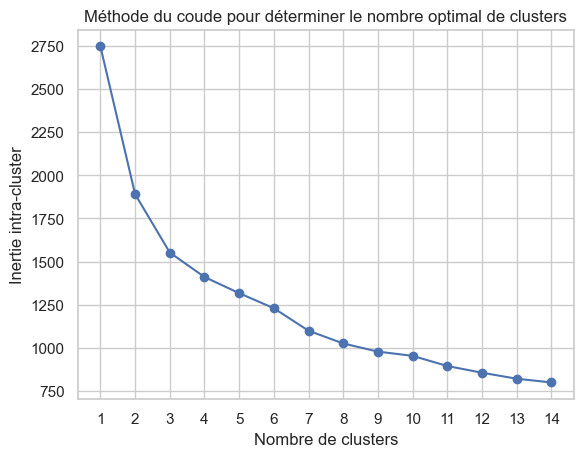

In [126]:
# Liste pour stocker les valeurs de l'inertie intra-cluster
inertias = []

# Nombre de clusters à explorer
k_range = range(1, 15)  # Vous pouvez ajuster la plage selon vos besoins

# Appliquer K-Means pour différents nombres de clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie intra-cluster')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xticks(k_range)
plt.show()

In [127]:
# Définir le nombre de clusters désirés
n_clusters = 9

# Créer et entraîner le modèle de clustering k-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Ajouter les étiquettes de cluster au DataFrame d'origine
df_act['cluster'] = kmeans.labels_

# Visualiser les centres de chaque cluster (vecteurs de mots)
print("Centres de cluster:")
print(kmeans.cluster_centers_)


# Vérification : afficher les valeurs uniques dans la colonne 'cluster'
print("Valeurs uniques dans la colonne 'cluster':")
print(df_act['cluster'].unique())

Centres de cluster:
[[-4.33680869e-19 -8.67361738e-19 -3.46944695e-18  2.60208521e-18
   8.67361738e-19  2.16840434e-18  8.67361738e-19  1.73472348e-18
   8.67361738e-19  0.00000000e+00 -2.16840434e-19  2.16840434e-18
   3.79990381e-02  6.93889390e-18  3.45467848e-02  3.46944695e-18
   1.30104261e-18  2.08166817e-17  0.00000000e+00 -4.33680869e-19
   8.67361738e-19  2.87722832e-02 -4.33680869e-19 -8.67361738e-19
   2.87722832e-02  6.93889390e-18  1.30104261e-18  1.73472348e-18
   1.73472348e-18  4.02894886e-01  3.46944695e-18  8.67361738e-19
   2.60208521e-18  8.67361738e-19  4.33680869e-18  4.06889931e-01
  -6.93889390e-18 -8.67361738e-19 -8.67361738e-19  8.67361738e-19
   1.73472348e-18  2.96594137e-02 -8.67361738e-19  8.67361738e-19
   2.10479262e-01  1.04083409e-17 -6.50521303e-19  6.93889390e-18
  -6.50521303e-19  8.67361738e-19 -1.73472348e-18  6.50521303e-19
   8.67361738e-19 -1.73472348e-18  5.20417043e-18 -6.50521303e-19
   6.50521303e-19  2.01910684e-01  1.38777878e-17  2.065

In [128]:
df_act[['cluster', 'type_seance']]

,cluster,type_seance
0,5,Footing EF
1,1,"Variation d'allures (VMA, Seuil60)"
2,0,Footing EF + 6LD
3,1,Sortie longue
4,5,Footing EF
...,...,...
249,8,Footing EF
250,3,Endurance de force
251,1,Introduction d'intensité (Seuil30)
252,1,introduction d'intensité (seuil60)


In [103]:
df_act['count-cluster'] = df_act.groupby('cluster')['cluster'].count()

In [104]:
df_act

,id,athlete,name,type,start_date_local,Unnamed: 5,distance,moving_time,total_elevation_gain,sport_type,...,Numéro de semaine,Durée de prépa,Numéro de seance,Seance/semaine,prepa_id,Cumul_weekly_volume,total_weekly_volume,year,cluster,count-cluster
0,10705542506,98364076,S10/18 - 1/5 - Prépa MDP - Footing EF,Run,2024-02-06T06:37:18Z,2024-02-06,6.2548,2400,55.0,Run,...,10,18,1,5,4.0,6.2548,31.9011,2024,0,85.0
1,10712557398,98364076,S10/18 - 2/5 - Prépa MDP - Variation d'allures...,Run,2024-02-07T06:30:04Z,2024-02-07,8.4681,2970,44.0,Run,...,10,18,2,5,4.0,14.7229,31.9011,2024,5,45.0
2,10725692821,98364076,S10/18 - 3/5 - Prépa MDP - Footing EF + 6LD,Run,2024-02-09T07:32:02Z,NaN,7.1799,2613,48.0,Run,...,10,18,3,5,4.0,21.9028,31.9011,2024,0,3.0
3,10732650255,98364076,S10/18 - 4/5 - Prépa MDP - Sortie longue,Run,2024-02-10T11:04:29Z,NaN,9.9983,3668,57.0,Run,...,10,18,4,5,4.0,31.9011,31.9011,2024,5,24.0
4,10651550873,98364076,S9 - 1/5 - Prépa MDP - Footing EF,Run,2024-01-29T06:40:30Z,2024-01-29,6.2794,2400,51.0,Run,...,9,18,1,5,4.0,6.2794,50.4743,2024,0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,10502925949,98364076,S5 - 3/4 - Prepa MDP - Footing EF,Run,2024-01-06T08:48:57Z,2024-01-06,7.3240,2703,46.0,Run,...,5,18,3,4,NaN,NaN,NaN,2024,0,NaN
250,10413277385,98364076,S3 - 3/4 - Prepa MDP - Endurance de force,Run,2023-12-21T07:13:23Z,2023-12-21,8.9999,3291,87.0,Run,...,3,18,3,4,NaN,NaN,NaN,2023,5,NaN
251,10325426361,98364076,S1 - 1/4 - Introduction d'intensité (Seuil30),Run,2023-12-04T06:34:42Z,2023-12-04,7.9020,2794,47.0,Run,...,1,18,1,4,NaN,NaN,NaN,2023,5,NaN
252,10335947213,98364076,S1 - 2/4 - Prepa MDP - introduction d'intensit...,Run,2023-12-06T06:33:26Z,2023-12-06,9.1301,3241,46.0,Run,...,1,18,2,4,NaN,NaN,NaN,2023,5,NaN


In [105]:
test = df_act.groupby('cluster').count().reset_index()
test

,cluster,id,athlete,name,type,start_date_local,Unnamed: 5,distance,moving_time,total_elevation_gain,...,moving_time_hour,Numéro de semaine,Durée de prépa,Numéro de seance,Seance/semaine,prepa_id,Cumul_weekly_volume,total_weekly_volume,year,count-cluster
0,0,85,85,85,85,85,84,85,85,85,...,85,85,85,85,85,83,83,83,85,3
1,1,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,0
2,2,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
3,3,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,0
4,4,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,0
5,5,69,69,69,69,69,68,69,69,69,...,69,69,69,69,69,66,66,66,69,3


<Axes: xlabel='cluster', ylabel='id'>

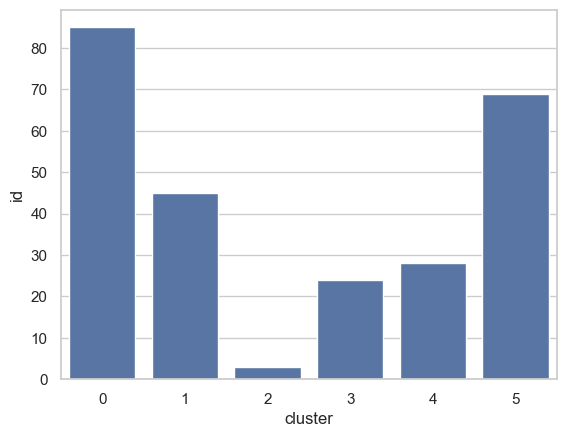

In [106]:
sns.barplot(data=df_act.groupby('cluster').count().reset_index(), x = 'cluster', y = 'id')

In [14]:
df_act.groupby('type_seance')['distance'].sum().reset_index()

,type_seance,distance
0,12 * (30/30) VMA,7.1748
1,Afternoon Run,7.5504
2,Allure 10km (objectif 4:45),15.3589
3,Allure 10km (objectif : 4:45),9.8978
4,Allure Semi,54.6665
...,...,...
69,footing EF,25.9547
70,introduction d'intensité (Seuil30),8.8040
71,introduction d'intensité (seuil60),9.1301
72,renfo,3.7589


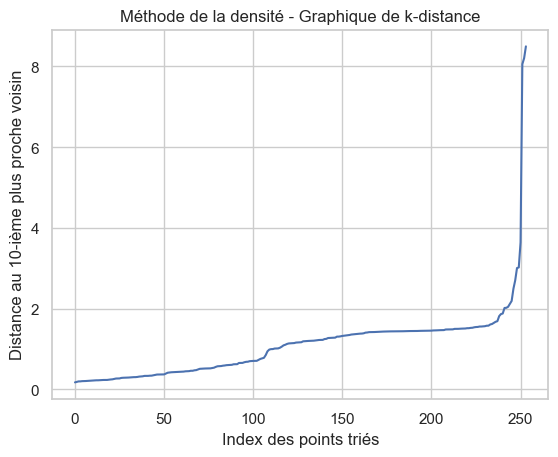

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors


# Calculer la distance au k-nearest neighbors pour chaque point
k = 10  # Choisir un k approprié, peut nécessiter des tests
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X)
distances, _ = neigh.kneighbors(X)
distance_to_kth_nearest_neighbor = distances[:, -1]

# Trier les distances et les tracer
sorted_distances = np.sort(distance_to_kth_nearest_neighbor)
plt.plot(np.arange(len(sorted_distances)), sorted_distances)
plt.xlabel('Index des points triés')
plt.ylabel(f'Distance au {k}-ième plus proche voisin')
plt.title(f'Méthode de la densité - Graphique de k-distance')
plt.show()

In [117]:
y_pred = DBSCAN(eps = 2 , min_samples=5).fit_predict(X)
df_act['cluster_dbscan'] = y_pred

In [118]:
df_act[['cluster', 'type_seance', 'cluster_dbscan']]


,cluster,type_seance,cluster_dbscan
0,0,Footing EF,0
1,5,"Variation d'allures (VMA, Seuil60)",0
2,0,Footing EF + 6LD,0
3,5,Sortie longue,0
4,0,Footing EF,0
...,...,...,...
249,0,Footing EF,0
250,5,Endurance de force,0
251,5,Introduction d'intensité (Seuil30),0
252,5,introduction d'intensité (seuil60),0


# Analysis

In [11]:
sns.barplot(data=df_act.groupby('type_seance')['distance'].sum(), x='type_seance', y='distance')

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Axes: xlabel='distance', ylabel='moving_time'>

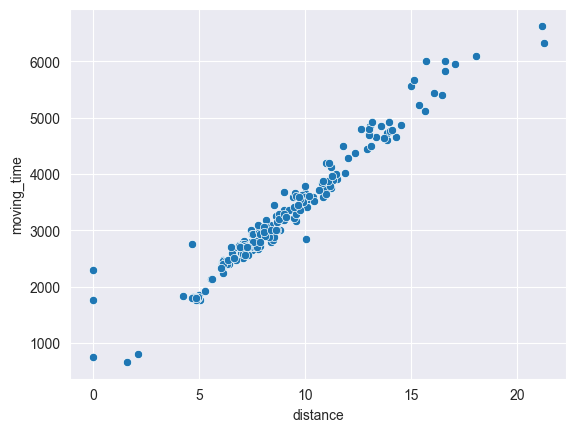

In [6]:
sns.scatterplot(
    data=df_act,
    x='distance',
    y='moving_time'
)

/Users/theocostes/Documents/repos/SynchronizeRunningData/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theocostes/Documents/repos/SynchronizeRunningData/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


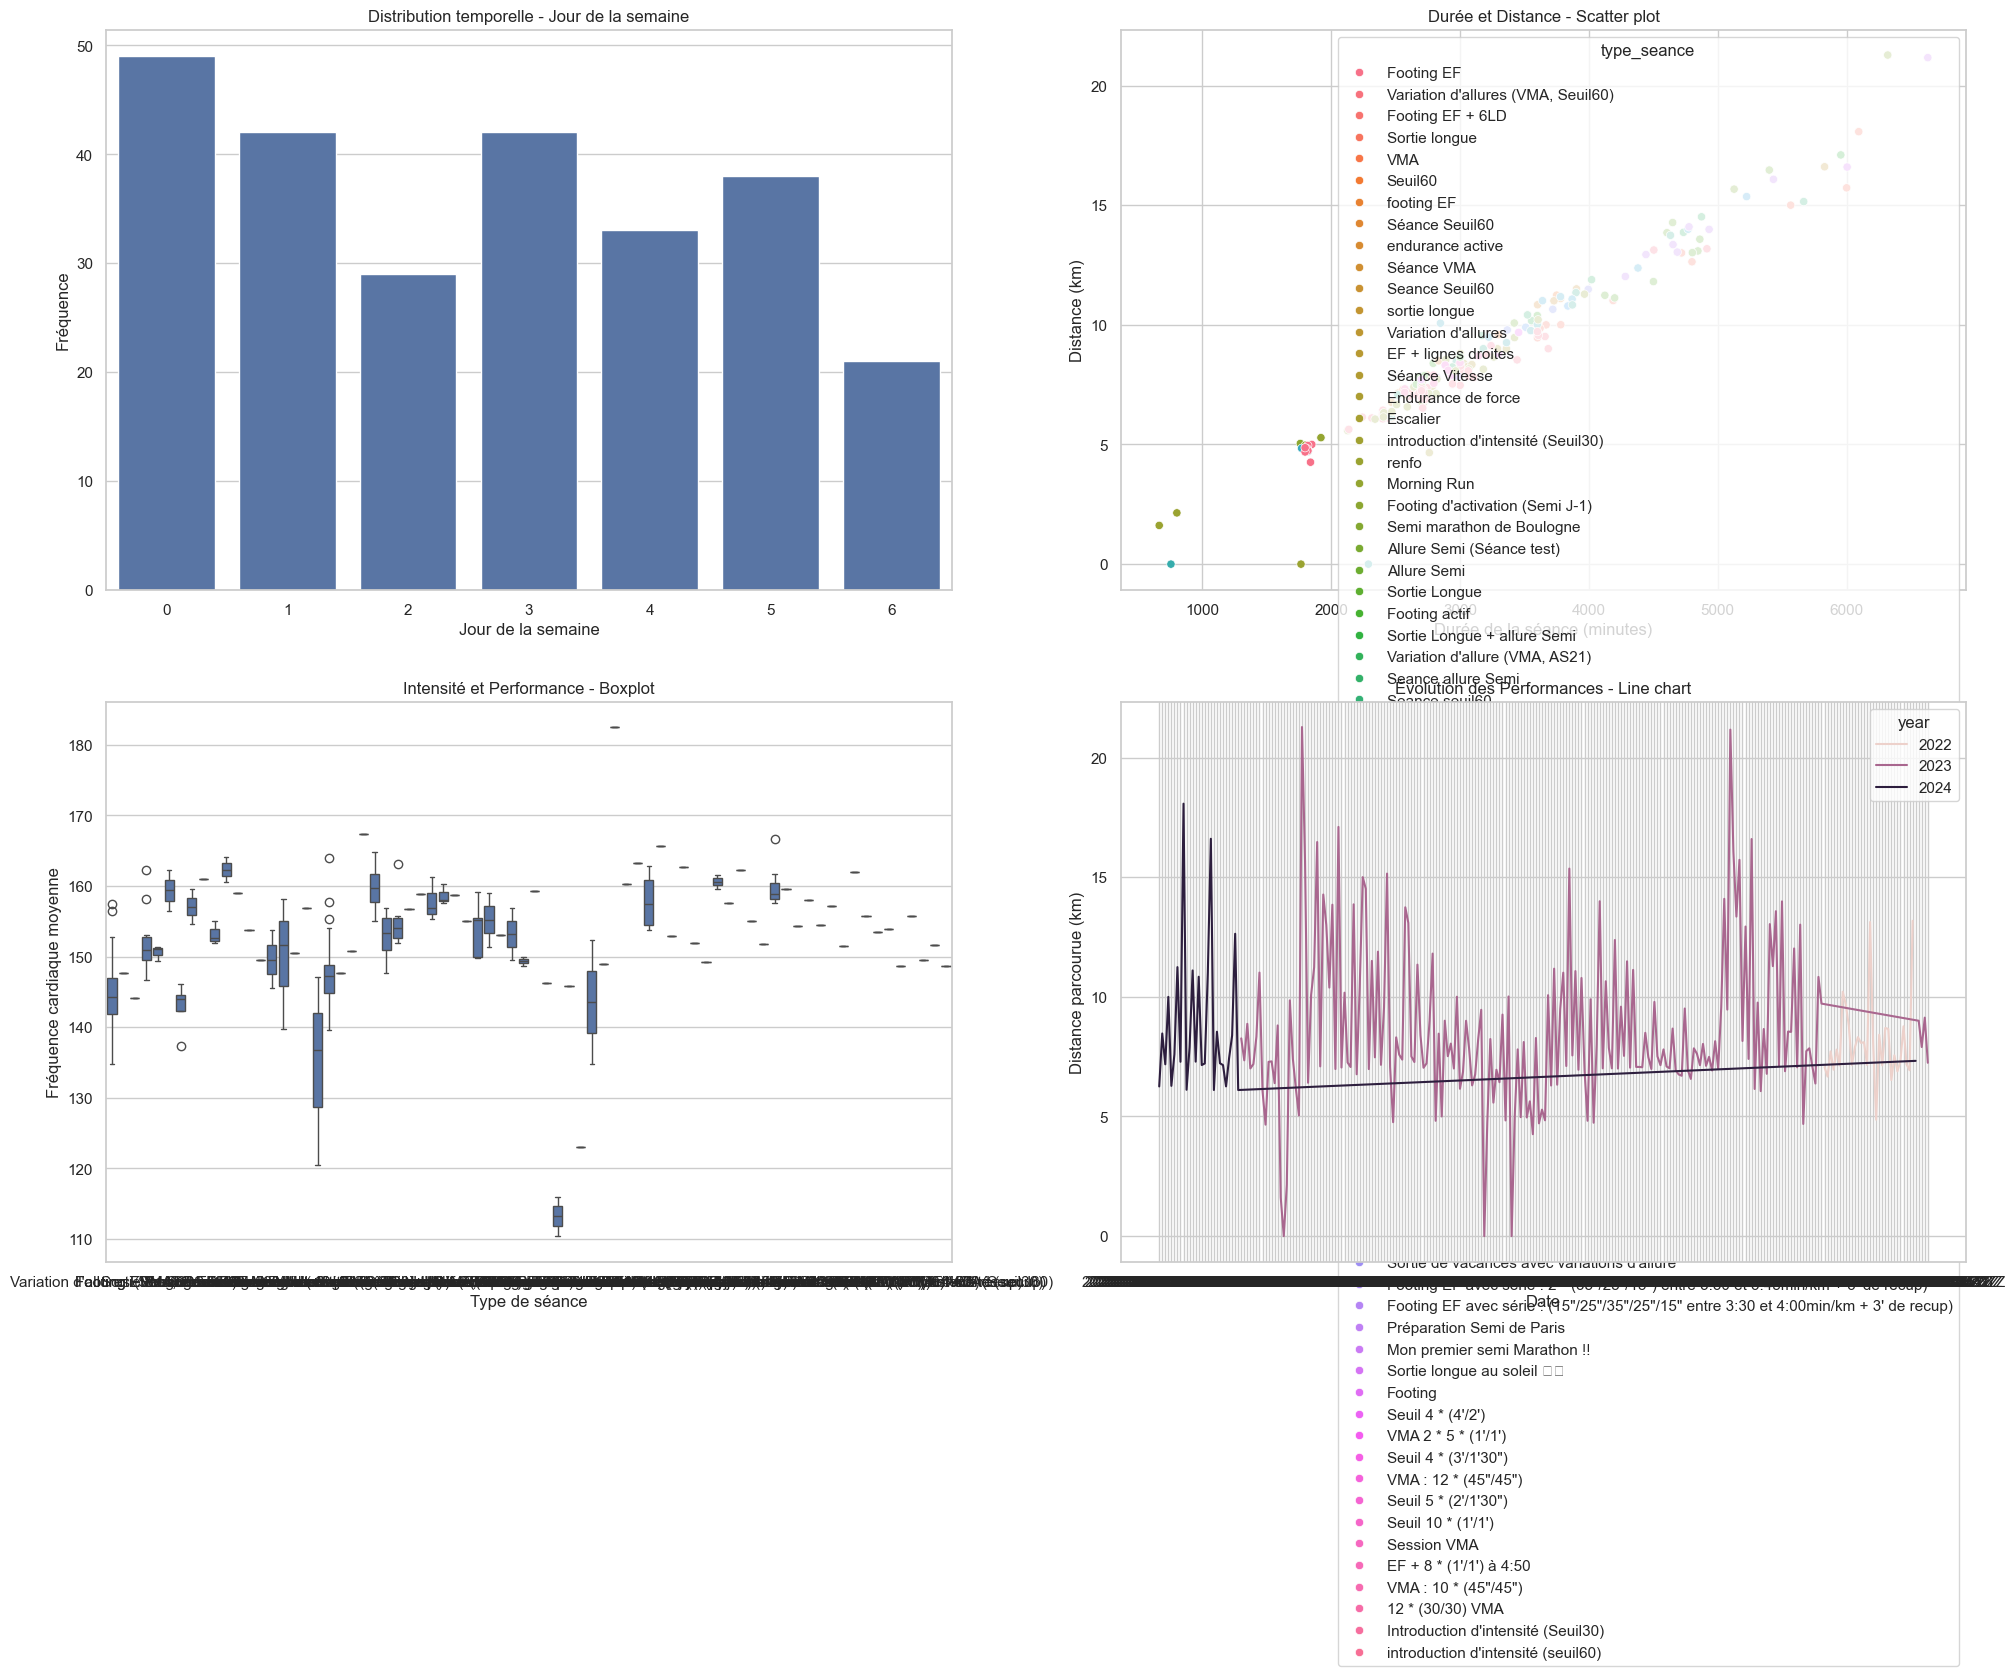

In [7]:
# Configuration pour améliorer l'apparence des graphes
sns.set(style="whitegrid")
plt.figure(figsize=(24, 16))

# Distribution temporelle - Histogramme de la fréquence des séances par jour de la semaine
plt.subplot(2, 2, 1)
sns.countplot(x=pd.to_datetime(df_act['start_date_local']).dt.dayofweek)
plt.xlabel('Jour de la semaine')
plt.ylabel('Fréquence')
plt.title('Distribution temporelle - Jour de la semaine')

# Durée et Distance - Scatter plot de distance par moving_time
plt.subplot(2, 2, 2)
sns.scatterplot(x='moving_time', y='distance', data=df_act, hue='type_seance')
plt.xlabel('Durée de la séance (minutes)')
plt.ylabel('Distance (km)')
plt.title('Durée et Distance - Scatter plot')

# Intensité et Performance - Boxplot de average_heartrate en fonction du type de séance
plt.subplot(2, 2, 3)
sns.boxplot(x='type_seance', y='average_heartrate', data=df_act)
plt.xlabel('Type de séance')
plt.ylabel('Fréquence cardiaque moyenne')
plt.title('Intensité et Performance - Boxplot')

# Évolution des Performances - Line chart de l'évolution de la distance parcourue au fil du temps
plt.subplot(2, 2, 4)
df_act['year'] = pd.to_datetime(df_act['start_date_local']).dt.year
sns.lineplot(x='start_date_local', y='distance', hue='year', data=df_act)
plt.xlabel('Date')
plt.ylabel('Distance parcourue (km)')
plt.title('Évolution des Performances - Line chart')


# Afficher les graphiques
plt.show()

[]

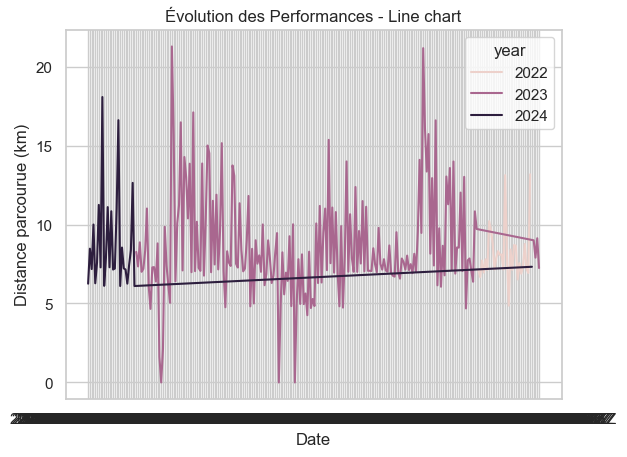

In [8]:
df_act['year'] = pd.to_datetime(df_act['start_date_local']).dt.year
sns.lineplot(x='start_date_local', y='distance', hue='year', data=df_act)
plt.xlabel('Date')
plt.ylabel('Distance parcourue (km)')
plt.title('Évolution des Performances - Line chart')

plt.plot()

In [11]:
max(df_act.start_date_local)

'2024-02-07T06:30:04Z'